<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Enfineering-CE784A-/blob/main/Assignment1_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
#imported necessary packages and libraries
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
from scipy.stats import moment
from scipy.stats import spearmanr
import cv2 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
% matplotlib inline

In [372]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [373]:
#path of train and test data
train_path = '/content/drive/MyDrive/mod_ravelling_dataset/train'
test_path = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [374]:
#path of raveling, non revaling and test data
Non_raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'
Raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Raveling'
test_data = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [375]:
Non_raveling_data

'/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'

In [376]:

list_nr = os.listdir(Non_raveling_data)
list_r = os.listdir(Raveling_data)
list_test = os.listdir(test_data)

In [377]:
list_test[0]

'2.jpg'

In [378]:
#list_r = (os.listdir(Raveling))

In [379]:
#list_r[:5]

In [380]:
img = []

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


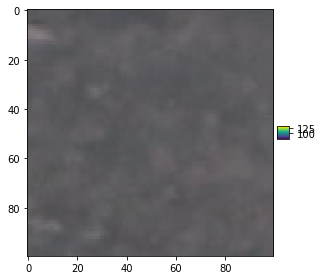

In [381]:
# stored non raveling image array in img_nr
img_nr = []
for i in range(len(list_nr)):
  img = io.imread(os.path.join(Non_raveling_data,
                               list_nr[i]))
  img_nr.append(np.array(img))
  io.imshow(img)

#stored raveling image array in img_r 
img_r = []
for i in range(len(list_r)):
  img = io.imread(os.path.join(Raveling_data,
                               list_r[i]))
  img_r.append(np.array(img))
  io.imshow(img)

#stored test image array in img_test
img_test = []
for i in range(len(list_test)):
  img = io.imread(os.path.join(test_data,
                               list_test[i]))
  img_test.append(np.array(img))
  io.imshow(img)


In [382]:
#confirmed the length of each images
print(len(img_nr))
print(len(img_r))
print(len(img_test))

351
349
300


In [383]:
#converted img_nr, img_r and img_test to array
img_nr = np.array(img_nr)
img_r = np.array(img_r)
img_test = np.array(img_test)

In [384]:
#confirmed the shapes
print(img_nr.shape)
print(img_r.shape)
print(img_test.shape)

(351, 100, 100, 3)
(349, 100, 100, 3)
(300, 100, 100, 3)


In [385]:
#array for storing features of training images
imgprop = []

#array for storing features of training images
imgprop_test = []


In [386]:
#stored features of non raveling images imgprop
for i in range(len(img_nr)):
  imgprop.append(
      [np.mean(img_nr[i][:,:,0]), np.std(img_nr[i][:,:,0]), 
       kurtosis((img_nr[i][:,:,0]).flatten()), skew((img_nr[i][:,:,0]).flatten()), 
       np.mean(img_nr[i][:,:,1]), np.std(img_nr[i][:,:,1]),
       kurtosis((img_nr[i][:,:,1]).flatten()), skew((img_nr[i][:,:,1]).flatten()),
       np.mean(img_nr[i][:,:,2]), np.std(img_nr[i][:,:,2]),
       kurtosis((img_nr[i][:,:,2]).flatten()), skew((img_nr[i][:,:,2]).flatten()),
       entropy((img_nr[i][:,:,0]).flatten()), entropy((img_nr[i][:,:,1]).flatten()), 
       entropy((img_nr[i][:,:,2]).flatten()), 
       (np.max(img_nr[i][:,:,0])-np.min(img_nr[i][:,:,0])),
       (np.max(img_nr[i][:,:,1])-np.min(img_nr[i][:,:,1])), 
       (np.max(img_nr[i][:,:,2])-np.min(img_nr[i][:,:,2])),
       spearmanr((img_nr[i][:,:,0]).flatten(),(img_nr[i][:,:,1]).flatten())[0],
       spearmanr((img_nr[i][:,:,1]).flatten(),(img_nr[i][:,:,2]).flatten())[0],
       spearmanr((img_nr[i][:,:,2]).flatten(),(img_nr[i][:,:,0]).flatten())[0],
       moment((img_nr[i][:,:,0]).flatten(), moment=2),moment((img_nr[i][:,:,1]).flatten(), moment=2),
       moment((img_nr[i][:,:,2]).flatten(), moment=2)
      
       ]
  )

#stored features of raveling images in imgprop
for i in range(len(img_r)):
  
  imgprop.append(
      [np.mean(img_r[i][:,:,0]), np.std(img_r[i][:,:,0]), 
       kurtosis((img_r[i][:,:,0]).flatten()), skew((img_r[i][:,:,0]).flatten()), 
       np.mean(img_r[i][:,:,1]), np.std(img_r[i][:,:,1]),
       kurtosis((img_r[i][:,:,1]).flatten()), skew((img_r[i][:,:,1]).flatten()),
       np.mean(img_r[i][:,:,2]), np.std(img_r[i][:,:,2]), 
       kurtosis((img_r[i][:,:,2]).flatten()), skew((img_r[i][:,:,2]).flatten()),
       entropy((img_r[i][:,:,0]).flatten()), entropy((img_r[i][:,:,1]).flatten()), 
       entropy((img_r[i][:,:,2]).flatten()),
       (np.max(img_r[i][:,:,0])-np.min(img_r[i][:,:,0])),
       (np.max(img_r[i][:,:,1])-np.min(img_r[i][:,:,1])), 
       (np.max(img_r[i][:,:,2])-np.min(img_r[i][:,:,2])),
       spearmanr((img_r[i][:,:,0]).flatten(),(img_r[i][:,:,1]).flatten())[0],
       spearmanr((img_r[i][:,:,1]).flatten(),(img_r[i][:,:,2]).flatten())[0],
       spearmanr((img_r[i][:,:,2]).flatten(),(img_r[i][:,:,0]).flatten())[0],
       moment((img_r[i][:,:,0]).flatten(), moment=2),moment((img_r[i][:,:,1]).flatten(), moment=2),
       moment((img_r[i][:,:,2]).flatten(), moment=2)
       ]
  )


#storing features of testing images in imgprop_test
for i in range(len(img_test)):
  
  imgprop_test.append(
      [np.mean(img_test[i][:,:,0]), np.std(img_test[i][:,:,0]),
       kurtosis((img_test[i][:,:,0]).flatten()), skew((img_test[i][:,:,0]).flatten()), 
       np.mean(img_test[i][:,:,1]), np.std(img_test[i][:,:,1]), 
       kurtosis((img_test[i][:,:,1]).flatten()), skew((img_test[i][:,:,1]).flatten()),
       np.mean(img_test[i][:,:,2]), np.std(img_test[i][:,:,2]), 
       kurtosis((img_test[i][:,:,2]).flatten()), skew((img_test[i][:,:,2]).flatten()),
       entropy((img_test[i][:,:,0]).flatten()), entropy((img_test[i][:,:,1]).flatten()), 
       entropy((img_test[i][:,:,2]).flatten()),
       (np.max(img_test[i][:,:,0])-np.min(img_test[i][:,:,0])),
       (np.max(img_test[i][:,:,1])-np.min(img_test[i][:,:,1])), 
       (np.max(img_test[i][:,:,2])-np.min(img_test[i][:,:,2])),
       spearmanr((img_test[i][:,:,0]).flatten(),(img_test[i][:,:,1]).flatten())[0],
       spearmanr((img_test[i][:,:,1]).flatten(),(img_test[i][:,:,2]).flatten())[0],
       spearmanr((img_test[i][:,:,2]).flatten(),(img_test[i][:,:,0]).flatten())[0],
       moment((img_test[i][:,:,0]).flatten(), moment=2),moment((img_test[i][:,:,1]).flatten(), moment=2),
       moment((img_test[i][:,:,2]).flatten(), moment=2)
       ]
  )



In [387]:
len(imgprop_test)

300

In [388]:

imgprop = np.array(imgprop)

In [389]:
imgprop.shape

(700, 24)

In [390]:
print(imgprop)

[[ 1.38337900e+02  2.84643448e+01  9.43863116e-02 ...  8.10218924e+02
   7.45549070e+02  6.55896923e+02]
 [ 1.18611600e+02  2.32703018e+01  1.02089073e+00 ...  5.41506945e+02
   4.29954163e+02  3.88692235e+02]
 [ 7.54408000e+01  1.50918884e+01  2.09268515e+00 ...  2.27765095e+02
   2.47493694e+02  2.40785236e+02]
 ...
 [ 1.19122000e+02  3.68910682e+01  1.52116804e-01 ...  1.36095092e+03
   1.36700646e+03  1.29890161e+03]
 [ 1.49974000e+02  3.36586649e+01 -7.37567366e-01 ...  1.13290572e+03
   8.59360717e+02  6.58267218e+02]
 [ 1.80892800e+02  2.84121437e+01 -2.97238148e-01 ...  8.07249908e+02
   7.68229304e+02  6.94728660e+02]]


In [391]:
print(imgprop_test)

[[122.803, 44.017555486419276, -0.10228540466300773, 0.35994963288909404, 118.7464, 43.7845005343215, -0.4772565985930495, 0.16461935585220824, 117.0976, 42.96283829357646, -0.7582702616670245, -0.1085623006126784, 9.145060300907184, 9.139446784661688, 9.137300147604924, 240, 248, 249, 0.9924204510580205, 0.9854993367548899, 0.9680653027172943, 1937.545191, 1917.0824870399997, 1845.8054742399997], [140.2517, 34.02395254978469, -0.9091631162155269, -0.20346274492699562, 137.8221, 30.797945574177508, -0.8089949008814181, -0.18729767504537054, 135.5449, 28.899293832029876, -0.6292781026647578, -0.20631127318381012, 9.179722706257166, 9.184500088037353, 9.186806752244236, 173, 168, 171, 0.9925279481693681, 0.9935447533715188, 0.9813859753487909, 1157.6293471099998, 948.5134515899999, 835.16918399], [119.0948, 28.676161056877888, 0.6306271383116053, 0.8921376388105714, 117.2614, 29.69595376545431, 0.593164923428303, 0.8582984842235929, 116.9665, 28.82387513416612, 0.5168159518432258, 0.7950

In [392]:
#created output, 0 for non raveling and 1 for raveling
y_nr = np.zeros(351)
y_r = np.ones(349)

y = np.concatenate((y_nr, y_r), axis = 0)
print(y.shape)

(700,)


In [393]:
#created data frame df from imgprop
df = pd.DataFrame(imgprop, columns = ['mean_r','std_r','kur_r', 'skew_r','mean_g','std_g','kur_g', 'skew_g',
                                      'mean_b','std_b','kur_b', 'skew_b','entropy_r', 'entropy_g',
                                      'contrast_r', 'contrast_g', 'contrast_b','corr_rg', 'corr_rb', 
                                      'corr_gb','moment_r','moment_g', 'moment_b','output'])

In [394]:
df.head()

,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,std_b,kur_b,skew_b,entropy_r,entropy_g,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,output
0,138.3379,28.464345,0.094386,-0.056400,137.8969,27.304744,0.127125,0.023725,136.1959,25.610485,0.155352,0.096476,9.188581,9.190343,9.192430,201.0,199.0,188.0,0.994537,0.993267,0.986306,810.218924,745.549070,655.896923
1,118.6116,23.270302,1.020891,-0.705944,121.7822,20.735336,4.076733,-1.400822,125.4254,19.715279,7.084289,-2.243884,9.189431,9.193842,9.195639,168.0,168.0,160.0,0.964331,0.903452,0.814814,541.506945,429.954163,388.692235
2,75.4408,15.091888,2.092685,0.666760,92.5225,15.731932,1.447621,0.405714,105.7420,15.517256,1.294005,0.329426,9.190653,9.195934,9.199591,152.0,145.0,139.0,0.969159,0.984680,0.946605,227.765095,247.493694,240.785236
3,119.2978,19.406662,0.870057,0.114697,120.1288,19.700538,0.894429,0.146365,121.1099,19.190212,0.983424,0.166054,9.196960,9.196762,9.197685,151.0,158.0,160.0,0.992205,0.992559,0.985618,376.618515,388.111211,368.264222
4,102.9519,31.177963,-0.045446,0.652460,106.3905,27.139919,0.560716,0.750621,111.1644,23.978778,1.013879,0.742046,9.165750,9.178812,9.187689,196.0,191.0,183.0,0.967471,0.970964,0.897996,972.065386,736.575210,574.981773


In [395]:
#created data frame df_test from X_pred
X_pred = pd.DataFrame(imgprop_test, columns = ['mean_r','std_r','kur_r', 'skew_r','mean_g','std_g','kur_g', 'skew_g',
                                               'mean_b','std_b','kur_b', 'skew_b','entropy_r', 'entropy_g', 'entropy_b',
                                                'contrast_r', 'contrast_g', 'contrast_b','corr_rg', 'corr_rb', 'corr_gb',
                                               'moment_r','moment_g', 'moment_b'])

In [396]:
X_pred.head()

,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,std_b,kur_b,skew_b,entropy_r,entropy_g,entropy_b,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b
0,122.8030,44.017555,-0.102285,0.359950,118.7464,43.784501,-0.477257,0.164619,117.0976,42.962838,-0.758270,-0.108562,9.145060,9.139447,9.137300,-16,-8,-7,0.992420,0.985499,0.968065,1937.545191,1917.082487,1845.805474
1,140.2517,34.023953,-0.909163,-0.203463,137.8221,30.797946,-0.808995,-0.187298,135.5449,28.899294,-0.629278,-0.206311,9.179723,9.184500,9.186807,-83,-88,-85,0.992528,0.993545,0.981386,1157.629347,948.513452,835.169184
2,119.0948,28.676161,0.630627,0.892138,117.2614,29.695954,0.593165,0.858298,116.9665,28.823875,0.516816,0.795042,9.182599,9.179594,9.181064,-87,-82,-84,0.987351,0.992381,0.972750,822.322213,881.849670,830.815778
3,114.3849,29.053563,-0.131899,0.538724,115.5630,25.856536,-0.082086,0.593437,116.9576,23.410284,-0.159362,0.505907,9.178664,9.185878,9.190633,-67,-79,-85,0.993507,0.993647,0.986175,844.109552,668.560431,548.041402
4,153.4332,40.466477,-0.752613,-0.316486,153.9201,36.641486,-0.543986,-0.391833,150.9596,32.773959,-0.219705,-0.521641,9.173421,9.180275,9.185209,-51,-66,-73,0.993688,0.991201,0.976096,1637.535738,1342.598516,1074.132368


In [397]:
X_pred = np.array(imgprop_test)

In [398]:
len(imgprop_test)

300

In [399]:
X_pred

array([[ 1.22803000e+02,  4.40175555e+01, -1.02285405e-01, ...,
         1.93754519e+03,  1.91708249e+03,  1.84580547e+03],
       [ 1.40251700e+02,  3.40239525e+01, -9.09163116e-01, ...,
         1.15762935e+03,  9.48513452e+02,  8.35169184e+02],
       [ 1.19094800e+02,  2.86761611e+01,  6.30627138e-01, ...,
         8.22322213e+02,  8.81849670e+02,  8.30815778e+02],
       ...,
       [ 1.15458700e+02,  3.72116177e+01, -1.19692485e+00, ...,
         1.38470449e+03,  1.09085038e+03,  8.81546958e+02],
       [ 2.00243900e+02,  2.65784351e+01,  8.28827027e-01, ...,
         7.06413213e+02,  7.44613806e+02,  7.51777321e+02],
       [ 1.24904300e+02,  4.55886668e+01, -9.19347511e-01, ...,
         2.07832654e+03,  1.83433650e+03,  1.57304486e+03]])

In [400]:
#created X parameters
X = imgprop

In [401]:

perms = np.random.permutation(700)

In [402]:
#created y parameters
y = np.array(y)

In [403]:
X = X[perms]
y = y[perms]

In [404]:
#converted y to categorical data
y = tf.keras.utils.to_categorical(y)

In [405]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [406]:
#split data in train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [407]:
#imported necessary packages for model
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [408]:
input_shape = [X_train.shape[1]]

In [409]:
#sequential MLP model 
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(2, activation = 'sigmoid'),
])

In [410]:
#compiling model
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

Epoch 1/500
40/40 [==============================] - 2s 9ms/step - loss: 0.7557 - accuracy: 0.6381 - val_loss: 2.2361 - val_accuracy: 0.5857
Epoch 2/500
40/40 [==============================] - 0s 4ms/step - loss: 0.6057 - accuracy: 0.7286 - val_loss: 1.3874 - val_accuracy: 0.6714
Epoch 3/500
40/40 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.7444 - val_loss: 1.0409 - val_accuracy: 0.7000
Epoch 4/500
40/40 [==============================] - 0s 4ms/step - loss: 0.5208 - accuracy: 0.7730 - val_loss: 0.8792 - val_accuracy: 0.7143
Epoch 5/500
40/40 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.7762 - val_loss: 0.7465 - val_accuracy: 0.7286
Epoch 6/500
40/40 [==============================] - 0s 4ms/step - loss: 0.4825 - accuracy: 0.7762 - val_loss: 0.6728 - val_accuracy: 0.7429
Epoch 7/500
40/40 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.7937 - val_loss: 0.6207 - val_accuracy: 0.7286
Epoch 8/500
4

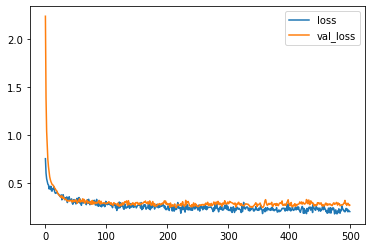

In [411]:
#training model
epochs = 500
history = model.fit(X, y, validation_split=0.1, batch_size=16,
                    epochs=epochs, verbose=1,
                    #validation_data=(X_test, y_test)
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [412]:
# score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256)
# print('test accuracy:', acc)

In [413]:
#predicting on test data X_pred
y_pred = model.predict(X_pred)
y_output = []

In [414]:
X_pred.shape

(300, 24)

In [415]:
len(y_pred)

300

In [416]:

for i in range(len(y_pred)):
  if(y_pred[i][0] > y_pred[i][1]):
    y_output.append("Non_raveling")
  else:
    y_output.append("Raveling")

In [417]:
y_output[:10]

['Raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling']

In [418]:
len(list_test)
len(y_output)

300

In [419]:
op_data = {'filename': list_test, 'class': y_output}

In [420]:
df_op = pd.DataFrame(op_data)
df_op

,filename,class
0,2.jpg,Raveling
1,3.jpg,Raveling
2,1.jpg,Non_raveling
3,198.jpg,Raveling
4,174.jpg,Raveling
...,...,...
295,20.jpg,Non_raveling
296,228.jpg,Raveling
297,74.jpg,Raveling
298,197.jpg,Raveling


In [421]:

df_op.to_csv("OutputM.csv", index = False)
!cp OutputM.csv "drive/My Drive/"